# Supervised Learning - Refurbished Devices Pricing 

### Context
Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.
 
### Objective
The used device data will be analyzed and used to build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

### Data Dictionary
- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

*used_price* will be used as the dependent variable. 

In [1]:
#Importing libraries and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for QQ plots:
import pylab
import scipy.stats as stats

#for Goldfeldquandt test: 
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Data Overview

In [2]:
data = pd.read_csv("used_device_data.csv")
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [3]:
#getting an idea of the shape of the dataset - rows and columns
data.shape
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.') #f-string 

There are 3454 rows and 15 columns.


In [4]:
# viewing a random sample of the data
np.random.seed(1)
data.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [6]:
data.dtypes

brand_name           object
os                   object
screen_size         float64
4g                   object
5g                   object
main_camera_mp      float64
selfie_camera_mp    float64
int_memory          float64
ram                 float64
battery             float64
weight              float64
release_year          int64
days_used             int64
new_price           float64
used_price          float64
dtype: object

Observations: 
- Within our dataset, we have 9 "float" type columns, 2 "integer" type columns, and 4 "object" type columns. "release_year" is actually a temporal value. 
- We also have varying numbers of null values between the columns. Many columns have missing (null) values within them. 

In [7]:
print("List of column names:", data.columns)

List of column names: Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')


In [8]:
#creating a copy of the original data to not mess anything up in the original
df = data.copy()

In [9]:
#running .nunique to see how many unique values are contained within each column
df.nunique()

brand_name            34
os                     4
screen_size          142
4g                     2
5g                     2
main_camera_mp        41
selfie_camera_mp      37
int_memory            15
ram                   12
battery              324
weight               555
release_year           8
days_used            924
new_price           2988
used_price          3094
dtype: int64

In [10]:
#checking for nulls/missing values using .isnull() and .sum() 
#this produces the total number of missing values within each column. 
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

- The column "main_camera_mp" has many missing values contained within it. We can likely fill these in with the appropriate medians later on. 
- The columns "selfie_camera_mp", "int_memory", "ram", "battery", and "weight" each have a few missing values as well. Since there are not that many, we can determine what to do with them later. 

## Exploratory Data Analysis

<b>Questions</b>:
1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [11]:
df.describe().T

#.T was used to transpose the table to make it easier to read
#Column names are now listed as the rows and the statistical summary points are now 
#listed as the columns instead of the other way around. 

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3452.0,6.554229,6.970372,0.00,2.0000,5.000,8.000,32.00
int_memory,3450.0,54.573099,84.972371,0.01,16.0000,32.000,64.000,1024.00
ram,3450.0,4.036122,1.365105,0.02,4.0000,4.000,4.000,12.00
battery,3448.0,3133.402697,1299.682844,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3447.0,182.751871,88.413228,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20


Observations: 
- This table contains the 5-point summary statistics for each numerical column within the dataset (integer and float types). This gives us the total count of values, the mean (average), standard deviation, the smallest value (min), the 1st/2nd/3rd quantile values, and the largest values (max). 
- We cannot calculate the summary statistics for columns with non-numerical data such as brand_name, os, 4g, 5g, and release_year. 

### Univariate Analysis

In [12]:
#histogram and boxplot function - numerical data

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"purple", 
                       "markeredgecolor":"purple",
                      "markersize":"7"}, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="violet", linestyle="-"
    )  # Add median to the histogram

mean: 92.30293572669365
mode: 0    34.30
1    58.32
2    68.84
3    86.76
dtype: float64
median: 81.87


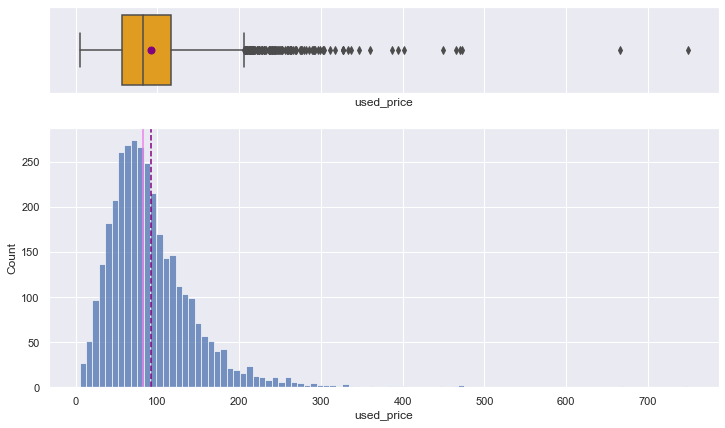

In [13]:
histogram_boxplot(df, 'used_price')

print("mean:", df['used_price'].mean())
print("mode:", df['used_price'].mode())
print("median:", df['used_price'].median())

<b>1. What does the distribution of used device prices look like? </b>

Observations: 
- The distribution of used device prices is very right-skewed. The distribution is influenced by the very high maximum value (749.52). 
- The average used device price is 92.30 euros. 
- The majority of the overall used device prices seen sit between approximately 50 and 115 euros. The data has multiple modes of 34.30, 58.32, 68.84, 86.76 euros, which may belong to the same device being sold multiple times. 
- The median used device price is 81.87 euros. 
- The boxplot is showing the presence of multiple outliers within this data. Because this column is very right-skewed, used_price will be log transformed to combat the skewness and make the distribution more normal. We will better assess the influence of the outliers later. 

In [14]:
#log transforming used_price to make the distribution more normal
df['used_price_log'] = np.log(df['used_price'])

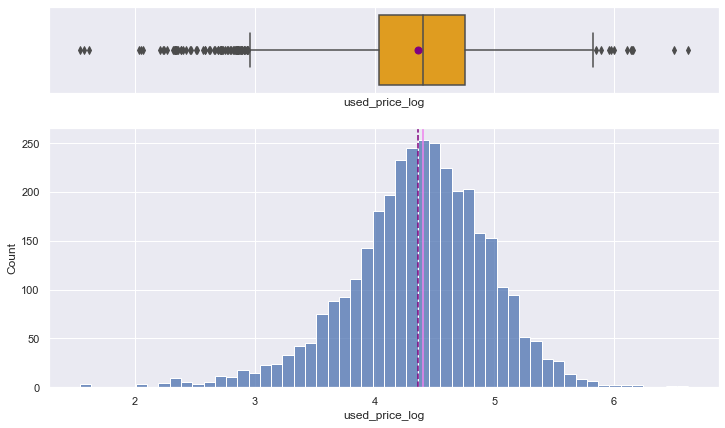

In [15]:
histogram_boxplot(df, 'used_price_log')

Observations: 
- After log transforming the data, the distribution is much more normal. 
- However, we are still seeing many outliers in the boxplot. We will assess the outliers for this variable later to see which values, if any, actually need to be treated or not. 

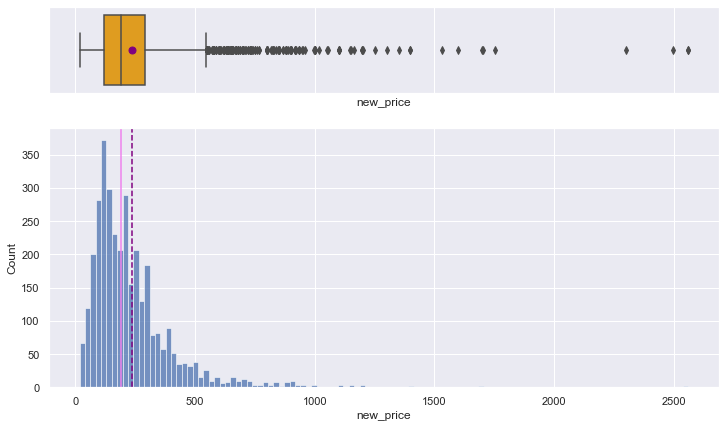

In [16]:
histogram_boxplot(df, 'new_price')

In [17]:
#log transforming used_price to make the distribution more normal
df['new_price_log'] = np.log(df['new_price'])

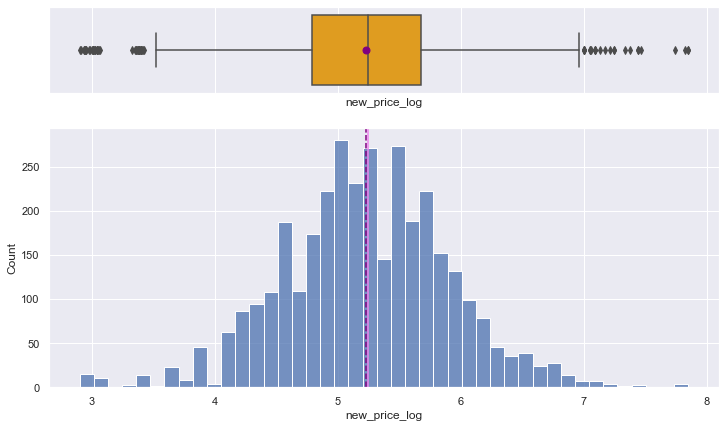

In [18]:
histogram_boxplot(df, 'new_price_log')

- The distribution of new device prices is also very right-skewed. The distribution also is influenced by the very high maximum values, going all the way up to 2560.20 euros. 
- The average new device price is approximately 250 euros. 
- The majority of the overall new device prices seen sit between approximately 0 and 500 euros.
- The boxplot is also showing the presence of multiple outliers within this data. Because this column is also very right-skewed, new_price was log transformed to combat the skewness and make the distribution more normal.
- After transforming the data, the new_price_log distribution is much more normally distributed. There are still some values flagged as outliers on the boxplot that we may assess later.

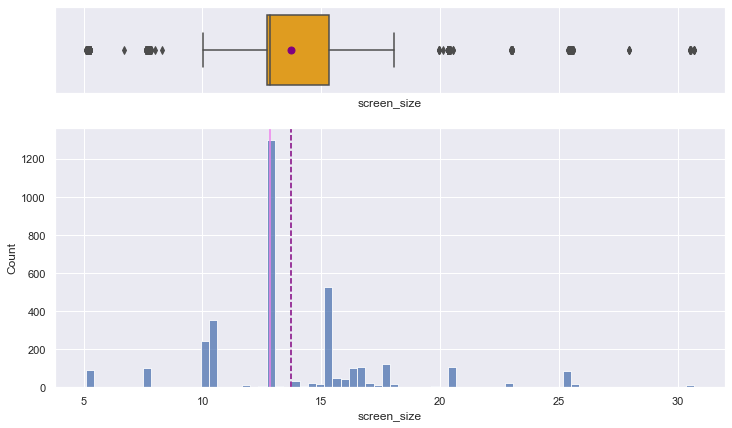

In [19]:
histogram_boxplot(df, 'screen_size')

- The size of the device screens widely varies. 
- The size of device screen ranges from approximately 5 cm up to 30 cm. 
- Many of the devices sold have a screen size of about 13 cm. 

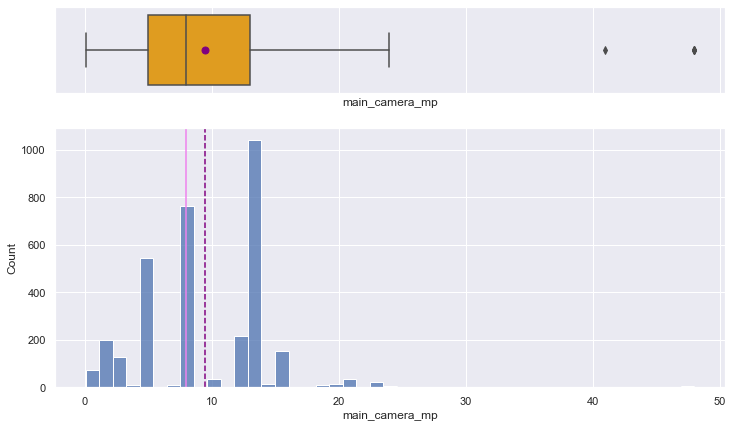

In [20]:
histogram_boxplot(df, 'main_camera_mp')

- The megapixels of the main camera of the devices sold ranges widely from less than 1 megapixel all the way up to approximately 48 megapixels. 
- A majority of devices have between approximately 5-15 megapixel main cameras. 

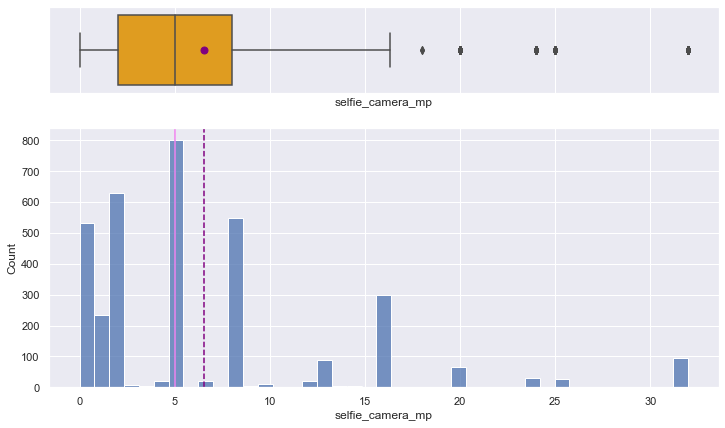

In [21]:
histogram_boxplot(df, 'selfie_camera_mp')

- The megapixels of the seflie (front) camera of the devices sold ranges widely from 0 megapixels all the way up to approximately 32 megapixels. 
- A majority of devices have between approximately 0-5 megapixel selfie cameras. 

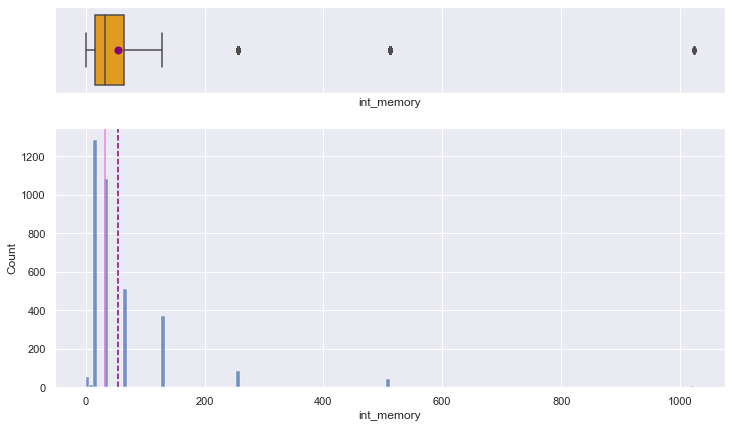

In [22]:
histogram_boxplot(df, 'int_memory')

- The internal memory of the devices sold ranges from less than 1 GB all the way up to over 1000 GB. 
- A majority of devices have between approximately 1-100 GB of memory. 

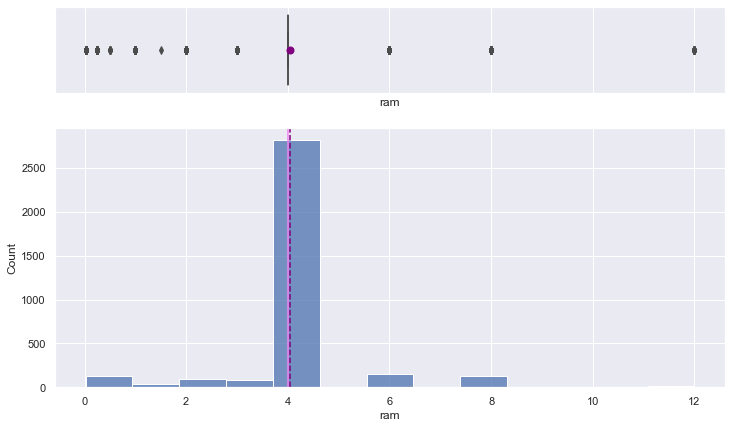

In [23]:
histogram_boxplot(df, 'ram')

- The internal ram of the devices ranges from less than 1 GB of ram all the way up to 12 GB of ram. 
- A majority of devices have 4-5 GB of ram. 

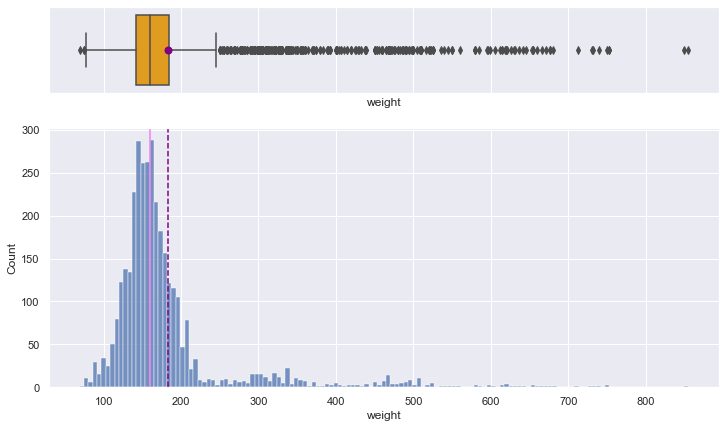

In [24]:
histogram_boxplot(df, 'weight')

- The weight distribution of the devices is very right-skewed.
- The device weights ranges widely from less than 100 grams for very light devices all the way up to approximately 900 grams for heavy devices.
- The majority of devices weigh between 120-200 grams. 

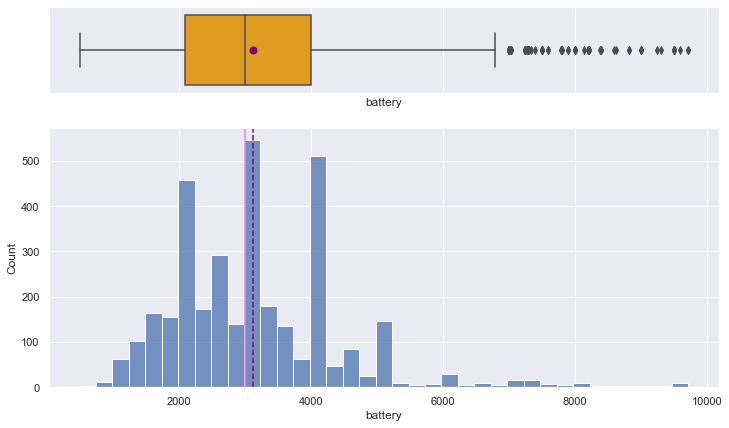

In [25]:
histogram_boxplot(df, 'battery')

- The energy capacity of the devices ranges widely from about 500 mAhs all the way up to approximately 10,000 mAhs. 
- A majority of devices have a battery capacity of between approximately 2000-4000 mAhs. 

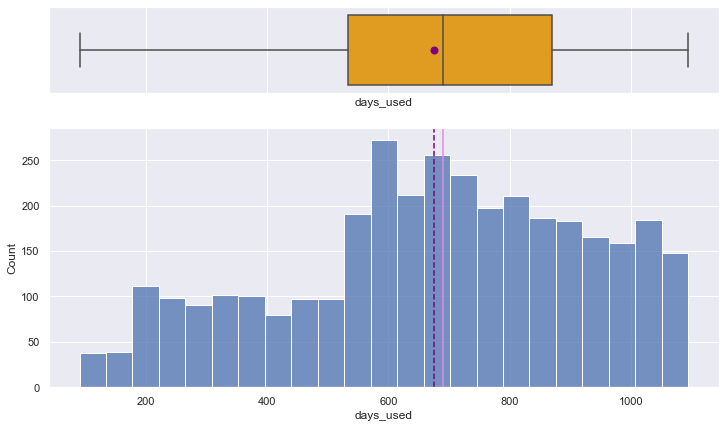

In [26]:
histogram_boxplot(df, 'days_used')

- The total numer of days used before being sold ranges widely as well. On the low end, some devices were only used for about 100 days (only a few months) while on the higher end, some devices were used for over 1,000 days (about 3 years). 
- A majority of devices were previously used for about 500-800 days (about 1.5-2.5 years). 

In [27]:
#labeled barplot function - categorical data

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", 
                       order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, 
                    xytext=(0, 5), textcoords="offset points")  # annotate the percentage
        plt.xticks(rotation = 60) #rotates the x-axis labels by 60 degrees

        
    plt.show()  # shows the plot

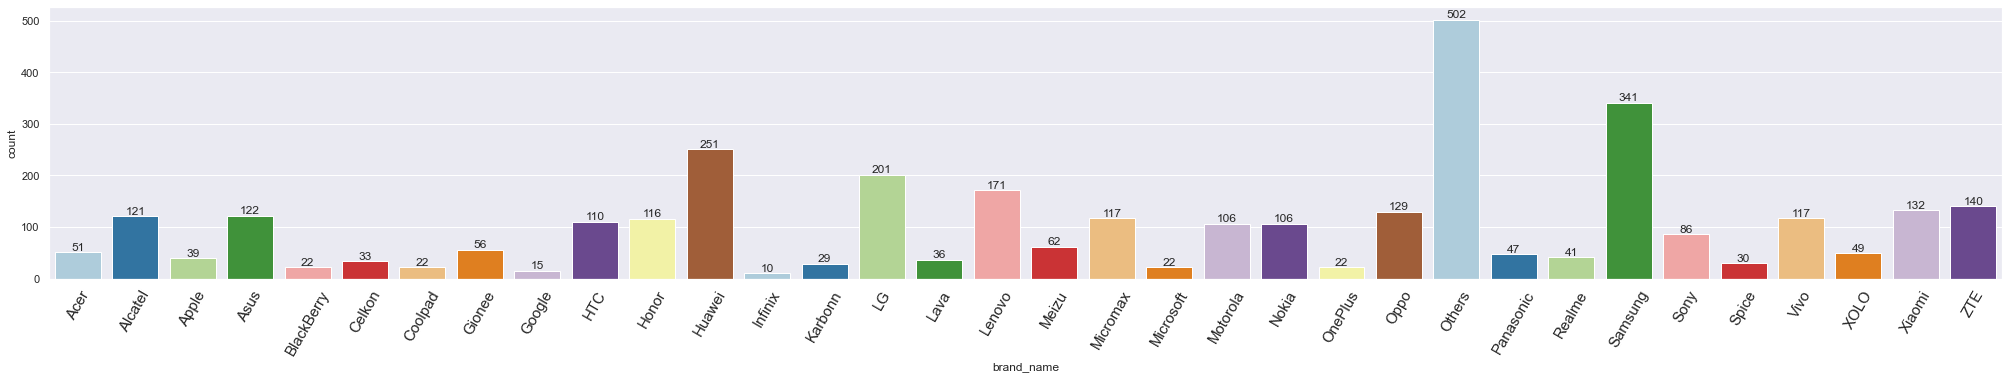

In [28]:
labeled_barplot(df, 'brand_name')

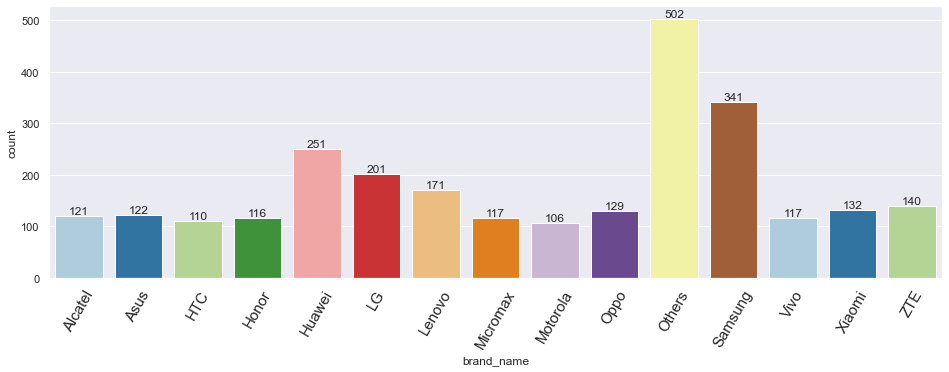

In [29]:
#random sample of 15 brand names to make the graph a bit easier to see
labeled_barplot(df, 'brand_name', n=15)

- Overall, there are about 100-300 devices from each unique brand within the dataset. 
- The biggest group contains the "other" brands, which is a catch-all for any other brand in existance. This group contains about 502 devices. 
- The largest single brand represented is Samsung and the smallest single brand represented is Infinix. 

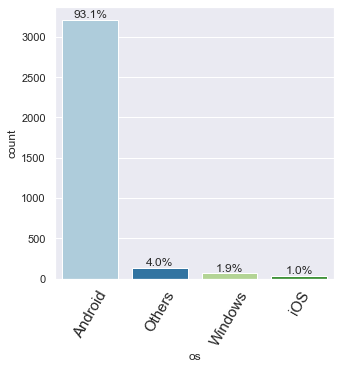

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64


In [30]:
labeled_barplot(df, 'os', perc=True)
print(df['os'].value_counts())

<b>2. What percentage of the used device market is dominated by Android devices? </b>

Observations: 
- 93.1% of the devices are on the Android operating system. Android devices make up the largest percentage of device operating systems. This makes sense given that the most common brand of device (besides the "other" miscellaneous category) is Sumsung which all run Android OSs. 
- 1.9% of the devices are on a Windows OS, 1.0% are on Apple's iOS, and 4.0% are on other operating systems. 

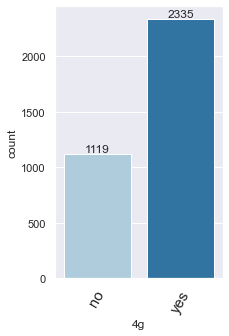

In [31]:
labeled_barplot(df, '4g')

- About 1/3 of the devices sold do not have 4g capabilities while the other 2/3 of the devices do. 

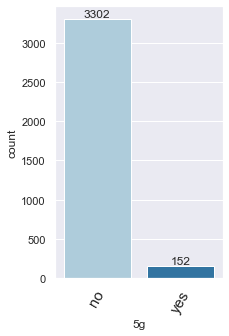

In [32]:
labeled_barplot(df, '5g')

- About 5% of the devices have 5g capabilities while the majority (the other 95% of the devices) do not have 5g capabilities. 

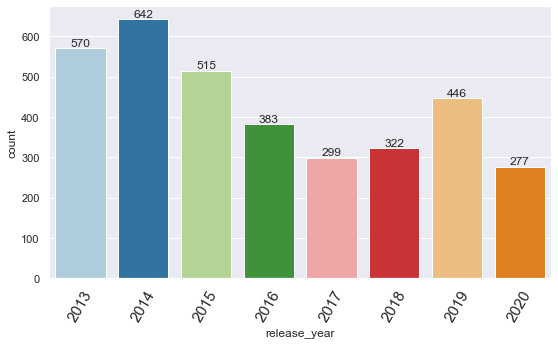

In [33]:
labeled_barplot(df, 'release_year')

- All of the devices in the dataset were released sometime between 2013 and 2020. 
- The majority of the devices were released in 2014, followed by 2013. This makes sense in the used device market as people are more likely to sell and upgrade their phones after a few years of use compared to phones that are only a year or two old. 

In [34]:
#converting appropriate object type columns to category types to make the generation of dummy variables easier later
categorical_variables = ["os", "4g", "5g"]

for colname in categorical_variables:
    df[colname] = df[colname].astype("category")
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   object  
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

- since these 3 columns (os, 4g, and 5g) have very discrete values, we can convert them to "category" types instead of "object" types. 

### Bivariate Analysis
#### Correlations

In [35]:
df[df.columns[:]].corr()["used_price"][:]

screen_size         0.529275
main_camera_mp      0.459209
selfie_camera_mp    0.614675
int_memory          0.378347
ram                 0.529434
battery             0.549647
weight              0.357983
release_year        0.494910
days_used          -0.385777
new_price           0.809335
used_price          1.000000
used_price_log      0.894738
new_price_log       0.775425
Name: used_price, dtype: float64

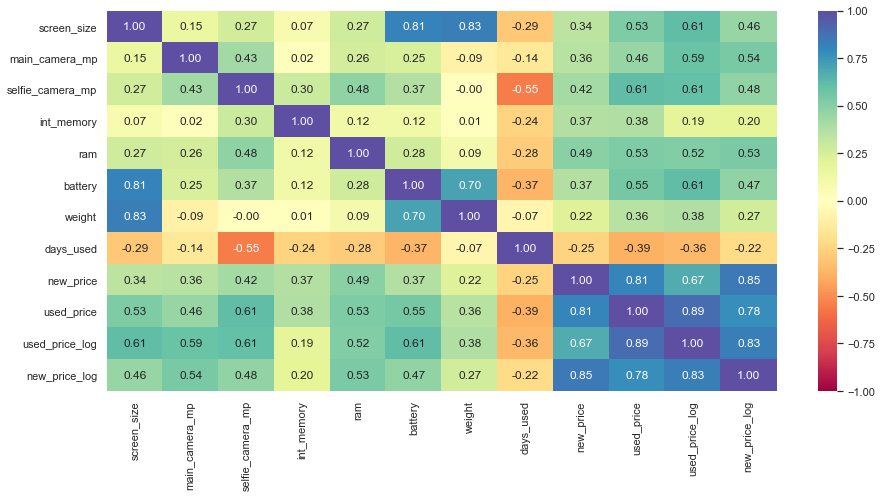

In [36]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year") #dropping year column because it is a temporal variable

#correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot = True, 
    vmin = -1, 
    vmax = 1,
    fmt = ".2f",
    cmap = "Spectral")
plt.show()

Observations: 
- battery and weight are particularly interesting. These are highly correlated with screen_size indicating that these may be traits that go together on many devices. These variables may be able to be grouped together for valuable insights. 
- Compared to our dependent variable (used_price), battery, screen_size, ram, selfie_camera_mp, and screen_size are the highest correlated. 

#### Boxplots and barplots

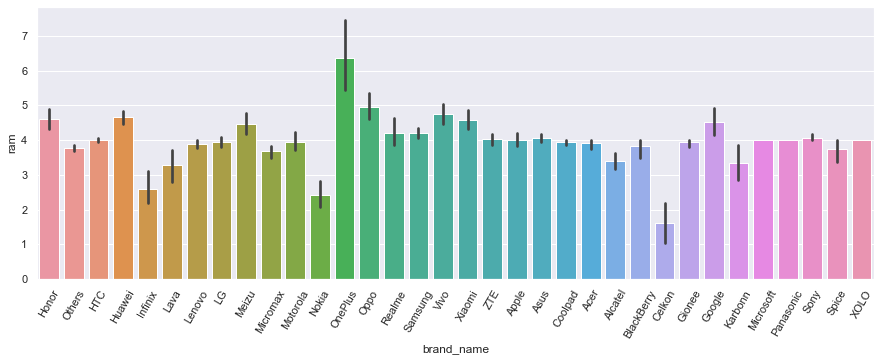

In [37]:
#brand_name vs ram
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=60)
plt.show()

<b>3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand? </b>

Observations: 
- The amount of RAM overall varies widely between brands. 
- OnePlus has the most RAM compared to any other brand available with a mean of approximately 6.3 GB. 
- Celkon has the least RAM compared to the other brands with a mean of approximately 1.5 GB. 
- Most brands seem to have a mean of about 2.5-5 GB of RAM overall. 

<b>4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)? </b>

In [38]:
#creating a large battery group

big_batteries = df[df.battery > 4500]
big_batteries.shape

(341, 17)

- The big_batteries dataframe has 341 rows and 18 columns. This means that there are 341 devices within our dataset that have batteries with more than 4500 mAhs. The 18 columns contain all of our normal variables from the original dataset. 

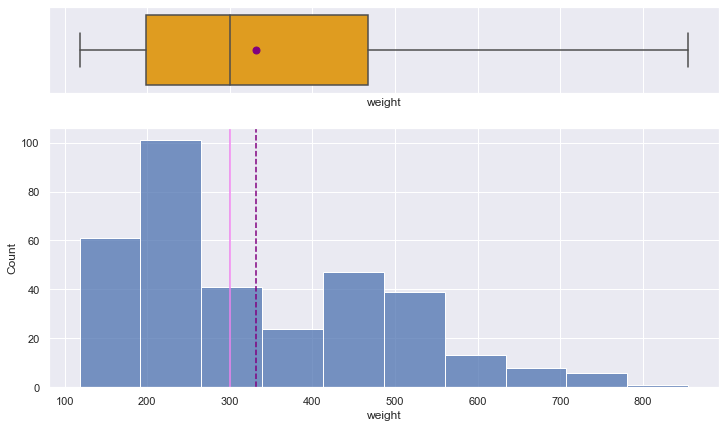

In [39]:
#making a histogram to see the weight distribution of only the devices with batteries of over 4500 mAhs:
#we will just use our histogram/boxplot function previously defined

histogram_boxplot(big_batteries, "weight")

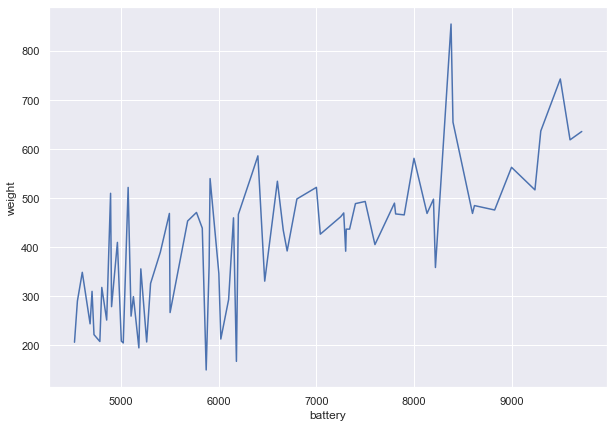

In [40]:
plt.figure(figsize=(10,7))
sns.lineplot(x="battery", y="weight", data=big_batteries, ci=None)
plt.show()

- For devices with over 4500 mAhs, the overall distribution of weight seems to not really be affected. There are still some devices in the distribution with big batteries that are very light (weight less than 200 grams). 
- The absolute heaviest device in our original dataset is still contained in this new dataframe. This device has over 8,000 mAhs and weights over 800 grams. However, the relationship between weight and battery life isn't perfectly linear. For example, the device with the best battery life (over 9,000 mAhs), only weighs about 650 grams. 
- Overall, the relationship between battery life and weight is positively correlated but it is not a perfect linear fit. 

<b> 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?</b>

In [41]:
#creating a large screen group
#the original dataframe has the screen size in centimeters. 
#to group together the devices with over 6 inch screens, we have to convert centimeters to inches
#using 2.54 cm = 1 inch

big_screens = df[df.screen_size > (6*2.54)]
big_screens.shape

(1099, 17)

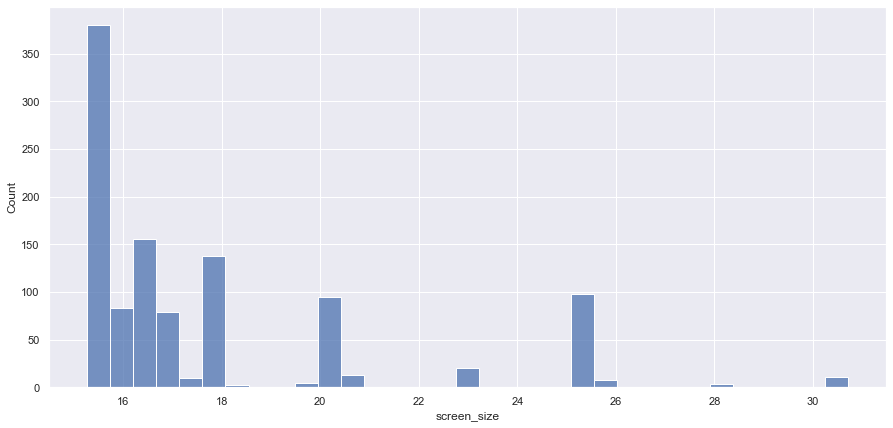

In [42]:
plt.figure(figsize=(15,7))
sns.histplot(big_screens["screen_size"])
plt.show()

- The big_screens dataframe has 1099 rows and 18 columns. This means that there are <b>1099 devices</b> within our dataset that have screens that are greater than 6 inches. 
- The 18 columns contain all of our normal variables from the original dataset. 
- The majority of screens that belong to this group are just barely over 6inches. The largest screen size in the dataset is 30.71 cm (12.09 inches). 

<b>6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands? </b>

In [43]:
#creating a "good front camera" group

good_selfie_cam = df[df.selfie_camera_mp > 8]
good_selfie_cam.shape

(655, 17)

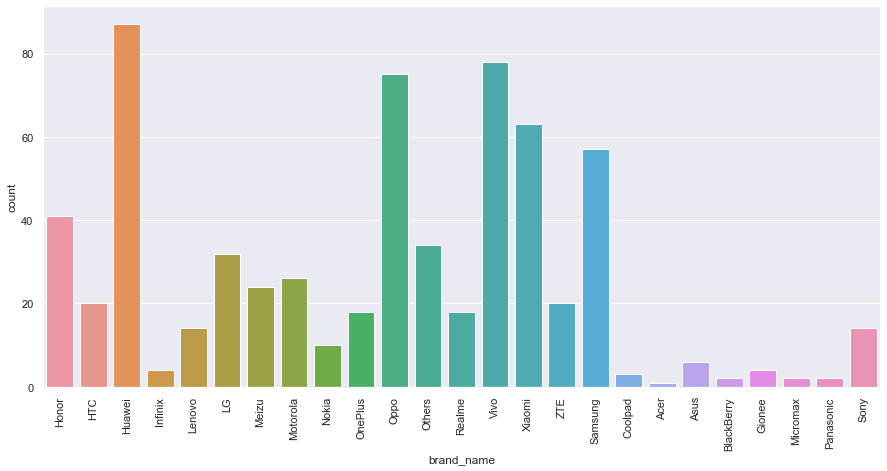

In [44]:
#comparing the devices with good selfie cameras by brand
#using a countplot

plt.figure(figsize=(15,7))
sns.countplot(x= "brand_name", data=good_selfie_cam)
plt.xticks(rotation = 90) #rotates the x-axis labels by 60 degrees
plt.show()

- It appears that the devices in our dataset that have good selfie cameras are not fully dominated by 1 brand.
- Many brands offer good selfie cameras nowadays. So if a customer is looking for a device with a good selfie camera, they do not need to limit their search to one specific brand in order to find one. 

However, this does not give us much of an idea of the prices of the devices with good selfie camera by brand. To get a better idea of this, we can separate all of our devices in our df dataframe into price categories. Then we can make another histogram of brands with good selfie cameras and use our price categories as a hue. 

In [45]:
#splitting devices into categories by price: budget, mid-range, premium using the new_price column 
#we will not be using the used_price column because other factors are likely to influence this value. 
#the new_price gives us a better idea of a "budget" phone vs a "premium" phone when it was originally sold. 

#using np.inf for numpy's infinity value and pd.cut to give benchmarks of where to group the data
df["device_category"] = pd.cut(df['new_price'], 
    [-np.inf, 200, 350, np.inf], 
    labels = ["Budget", "Mid-Range", "Premium"])
#groups the devices into categories of less than 200, 200-350, and more than 350 

print(df["device_category"].value_counts())
df.head()

Budget       1844
Mid-Range    1025
Premium       585
Name: device_category, dtype: int64


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,device_category
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,4.307572,4.715100,Budget
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.162097,5.519018,Mid-Range
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,5.111084,5.884631,Premium
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,5.135387,5.630961,Mid-Range
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,4.389995,4.947837,Budget


- All of the devices have been separated into the 3 categories. 
- These value counts contain all of the devices in the df dataframe. There are now 1844 devices in the "Budget" category, 1025 devices in the "Mid-Range" category, and 585 devices in the "Premium" category. 
-  We will now make another dataframe of good selfie camera phones so that the dataframe can contain the device_category column. 

In [46]:
#creating another "good front camera" group with the extra column

good_selfie_cam2 = df[df.selfie_camera_mp > 8]
print(good_selfie_cam2.shape)
good_selfie_cam2.head()

(655, 18)


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,device_category
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.162097,5.519018,Mid-Range
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,132.43,4.886054,5.299916,Mid-Range
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,499.68,217.73,5.383256,6.213968,Premium
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,221.13,101.25,4.617593,5.398751,Mid-Range
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,249.12,151.77,5.022366,5.517935,Mid-Range


- device_category is now part of the good_selfie_cam2 dataframe. Now we can visualize this data. 

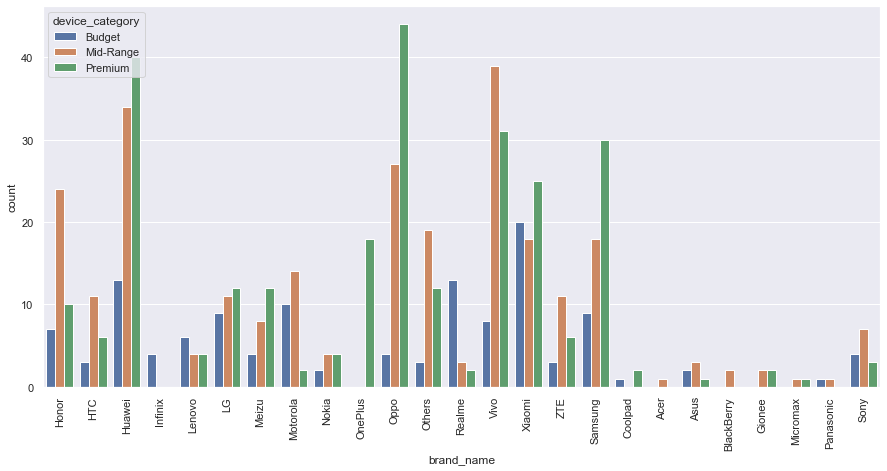

In [47]:
#comparing the devices with good selfie cameras by brand AND device_category
#using a countplot with a hue

plt.figure(figsize=(15,7))
sns.countplot(x= "brand_name", hue="device_category", data=good_selfie_cam2)
plt.xticks(rotation = 90) #rotates the x-axis labels by 60 degrees
plt.show()

- This gives us a better idea of the brands with good selfie cameras but separated by the device category. 
- For example: there are about 20 devices from the brand Xiaomi that have good selfie cameras AND are under 200 euros. 
- Another example: there are several devices (over 45) from the brand Oppo that have good selfie cameras but these are all premium devices and cost most than 350 euros. 
- This graph provides valuable info for customers that may want a device with a good selfie camera but want to stick to a specific budget. 

We can also repeat this same analysis with the back camera using the same methods. Front cameras tend to be much smaller than back/main cameras so the results may provide us with different information. 

In [48]:
#creating a "good back camera" group with the device_category column
#the overall mean and maximum values for the main camera megapixels in the original dataset is higher
#so we can consider a "good front camera" to be a camera with 16 megapixels instead of 8. 

good_front_cam = df[df.main_camera_mp > 8]
print(good_front_cam.shape)
good_front_cam.head()

(1560, 18)


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,device_category
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,4.307572,4.715100,Budget
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.162097,5.519018,Mid-Range
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,5.111084,5.884631,Premium
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,5.135387,5.630961,Mid-Range
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,4.389995,4.947837,Budget


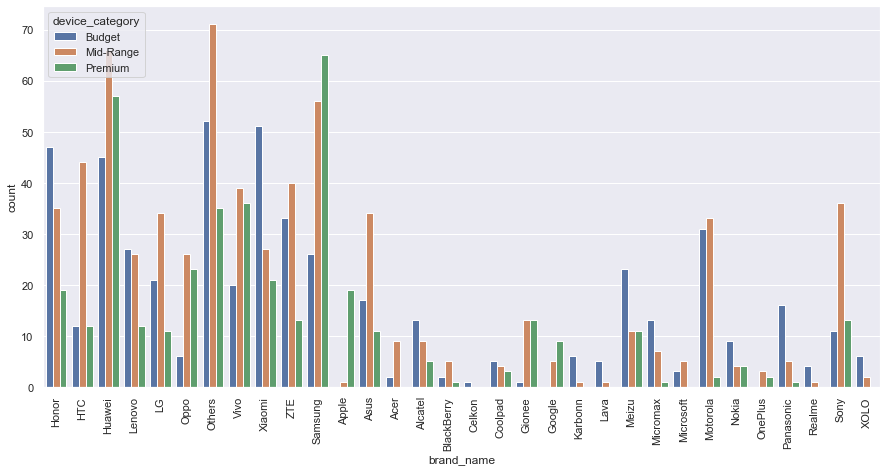

In [49]:
#comparing the devices with good main cameras by brand AND device_category
#using a countplot with a hue

plt.figure(figsize=(15,7))
sns.countplot(x= "brand_name", hue="device_category", data=good_front_cam)
plt.xticks(rotation = 90) #rotates the x-axis labels by 60 degrees
plt.show()

- If a customer wants a really good main camera instead of a good selfie camera (for photos of other people,  landscapes, etc.), the customer should be looking at different brands compared to the selfie camera analysis. 
- The brand Xiaomi still contains the most devices with good main cameras that are in the budget category (cost under 200 euros). 
- The brand Huawei contains many devices that are in a mid-range budget that have good main cameras. 
- Finally, Samsung has many devices with really good main cameras that are housed within a premium priced phone. 
    - Based on these graphs, Samsung offers really great main cameras but these phones may not also have a good selfie camera in it as well. 

<b>7. Which attributes are highly correlated with the price of a used device? </b>

Observations: 
- Based on the heat map above, battery, screensize, ram, selfie_camera_mp, and screen_size are the highest correlation values with used_price compared to the other attributes. 
    - selfie_camera_mp has the highest correlation with a value of 0.61
- new_price also has a high correlation value with used_price but these two variables seem like they would be very highly correlated anyways when you think about this logically. 

##### Used_price over time

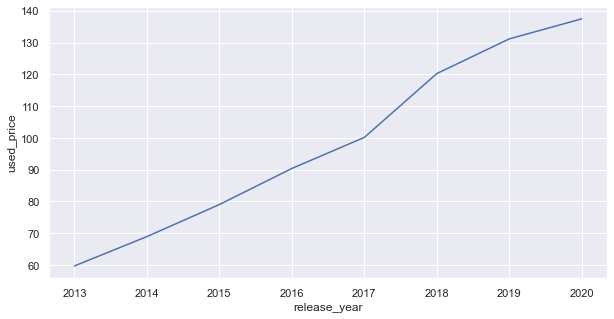

In [50]:
#used_price vs release_year
plt.figure(figsize=(10,5))
sns.lineplot(x="release_year", y="used_price", data=df, ci=None)
plt.show()

- Older phones are less expensive to buy used compared to newer phones.
- As the release year increases (and phones are newer), the price when used is more expensive.
- The price of used phones is increasing overall by year.

##### 4g and 5g availability by device_category

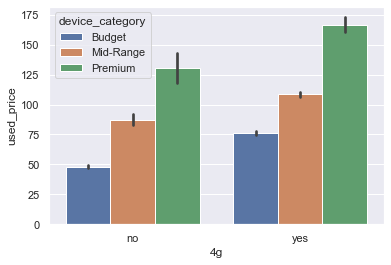

In [51]:
sns.barplot(data=df, x="4g", y="used_price", hue="device_category")
plt.show()

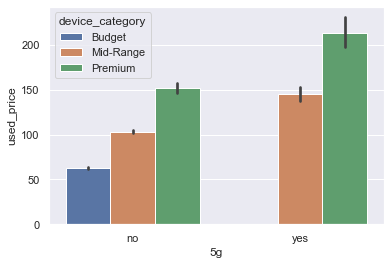

In [52]:
sns.barplot(data=df, x="5g", y="used_price", hue="device_category")
plt.show()

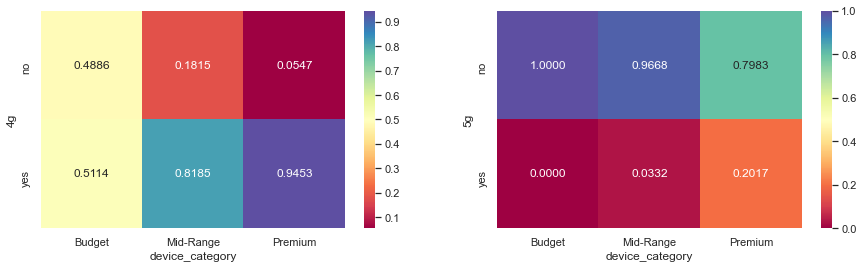

In [53]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral")

plt.subplot(122)
sns.heatmap(pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral")

plt.show()

Overall, with the 2 barplots and the 2 heatmaps, we can draw a few observations:

4g: 
- There are not very many premium devices that do not have 4g capabilities. Therefore, if a customer has a premium budget, they are more than likely going to be able to get a device that at least has 4g capabilities. 
- There are many devices in the mid-range category that also have 4g capabilities. Not all of the devices in this category do, but many of them have 4g. 
- In the budget device category, approximately 50% of the devices are 4g compatible wile about 50% are not. 

5g: 
- There are no devices that are in the budget category (cost under 200 euros) that have 5g capabilities. 
- There are very few devices with 5g capability in the mid-range category. 
- About 80% of the premium devices are 5g capable while 20% are not. 
- Almost all of the devices of the entire dataset, the ones that have 5g capabilities typically cost over 350 euros. 

## Data Preprocessing

### Feature Engineering
- adding device_category done above

### Missing Value Treatment

In [54]:
#creating another copy of the data
df1 = df.copy()

In [55]:
#counting the number of missing values in each column
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
device_category       0
dtype: int64

- Many columns do not have any missing values
- The "main_camera_mp" column has valuable information that we should not get rid of. So we will not be dropping the column. 

In [56]:
#counting the number of missing values per row
df1.isnull().sum(axis=1).value_counts()

0    3253
1     200
2       1
dtype: int64

- Most rows are only missing 1 value. 
- Only 1 row has more than 1 missing value. 

In [57]:
#filling in the missing values from the columns: 
    #main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight 
#using the column medians grouped by brand_name

cols_with_missings = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight"]

for col in cols_with_missings:
    df1[col] = df1.groupby('brand_name')[col].transform(lambda x: x.fillna(x.median()))

#to check if this worked:
df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
used_price_log       0
new_price_log        0
device_category      0
dtype: int64

- main_camera_mp still has some missing values. To investigate if there are any patterns to this, a random sample of rows with missing values in the "main_camera_mp" column will be pulled to see what is going on. 
- It is likely due to that particular brand name may only contain null values for the entirety of the "main_camera_mp" column. If this is the case, a median for that brand name could not have been calculated and the values stayed as NaNs. 

In [58]:
num_missing = df1.isnull().sum(axis=1)
df1[num_missing == 1].sample(n=5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,device_category
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,129.81,83.37,4.423289,4.866072,Budget
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,130.49,82.82,4.416670,4.871297,Budget
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,100.02,81.87,4.405133,4.605370,Budget
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,110.18,89.65,4.495913,4.702115,Budget
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,90.51,65.46,4.181439,4.505460,Budget


- The missing values do in fact all have the same brand name. Below, we are checking this one more time. 

In [59]:
print(df1.groupby("brand_name")["main_camera_mp"].median().sort_values())

brand_name
Celkon         3.15
Acer           5.00
Alcatel        5.00
Micromax       5.00
Spice          5.00
Nokia          5.00
Karbonn        5.00
Panasonic      8.00
Microsoft      8.00
Lenovo         8.00
Lava           8.00
LG             8.00
Others         8.00
Gionee         8.00
BlackBerry     8.00
XOLO           8.00
Samsung        8.00
Apple         12.00
Google        12.20
Vivo          13.00
Realme        13.00
Sony          13.00
Meizu         13.00
OnePlus       13.00
Motorola      13.00
Xiaomi        13.00
Huawei        13.00
Honor         13.00
HTC           13.00
Coolpad       13.00
Asus          13.00
Oppo          13.00
ZTE           13.00
Infinix         NaN
Name: main_camera_mp, dtype: float64


- The brand name "Infinix" has only NaN values so a median could not be calculated. To combat this, we will be filling in the rest of these missing values using the column median, not grouped by a particular brand name. 

In [60]:
#main_camera_mp by column median

for col in cols_with_missings:
    df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) 
    
#to check if it worked:
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
device_category     0
dtype: int64

- The NaN values from every column have now been fixed. 

### Outlier Detection and Treatment

In [61]:
numerical_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numerical_columns.remove("release_year")
print(numerical_columns)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'new_price', 'used_price', 'used_price_log', 'new_price_log']


In [62]:
#creating a whole new dataframe with just the numerical variables
numerical_columns_df = df1.copy()
numerical_columns_df = numerical_columns_df.select_dtypes(include=np.number)
# dropping release_year as it is a temporal variable
#numerical_columns_df.drop("release_year")
numerical_columns_df.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,4.307572,4.715100
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.162097,5.519018
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,5.111084,5.884631
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,5.135387,5.630961
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,4.389995,4.947837


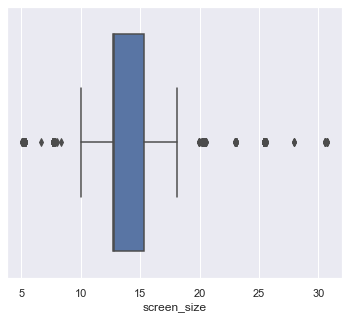

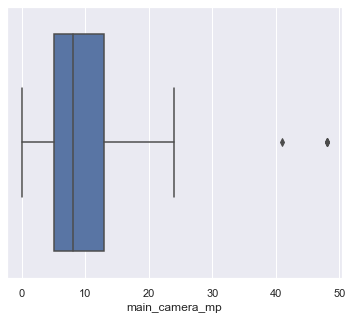

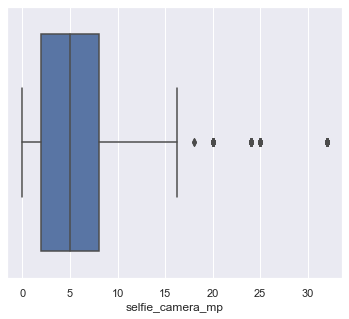

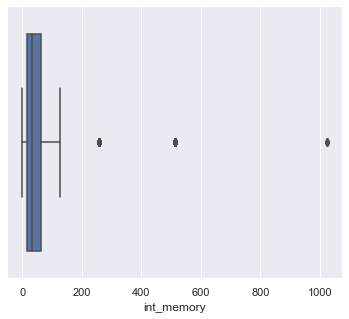

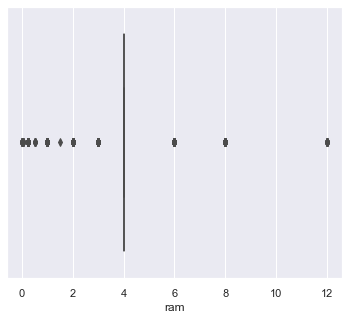

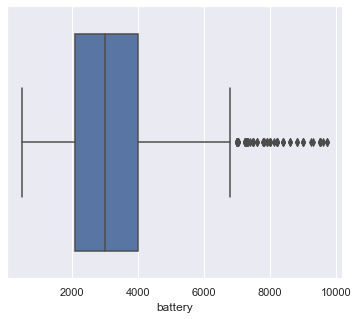

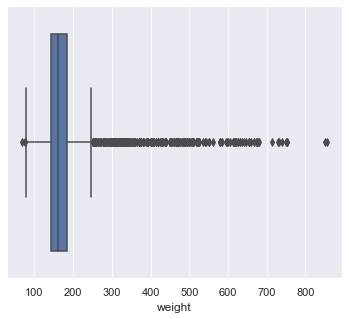

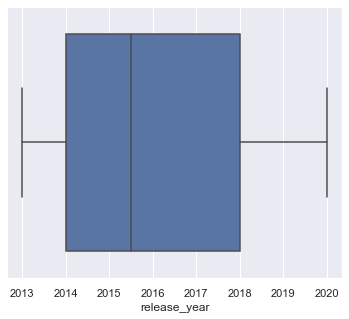

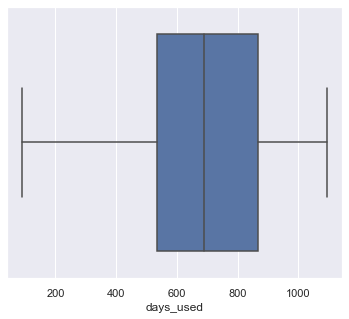

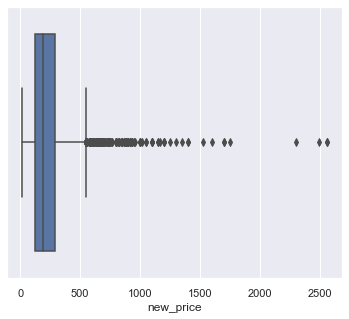

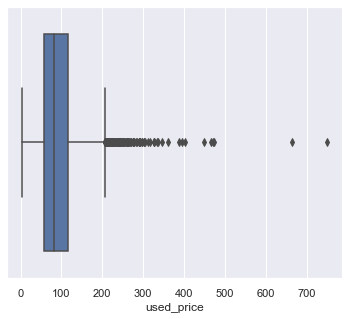

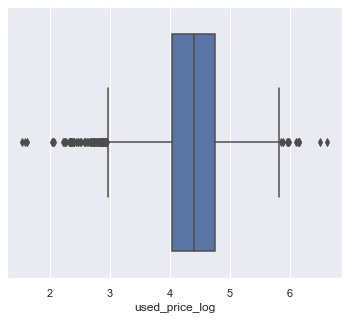

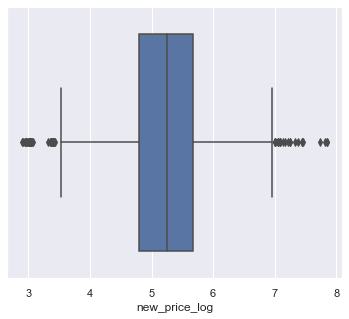

In [63]:
for column in numerical_columns_df:
    plt.figure(figsize=(6,5))
    sns.boxplot(data=numerical_columns_df, x=column)

- Many of the numerical columns have multiple outliers. 
- Most of these columns are independent variables and have ordinal, discrete values. So, even though many values are detected as outliers, we can use them as is and not fix them in any way. 
- The outliers that we really need to analyze are those of the "used_price_log" and "new_price_log" variables. 
    - Most of these outliers from these variables are flagged by the boxplot. But within the histograms for these variables (produced earlier), we can see that these outliers really are not inconsisent with the overall distribution of the data and the data is normally distributed. 
- All of the outliers from the numerical variables do not seem to be problematic overall. Therefore, they will not be treated or dropped. We will just stick to the original transformed variables. 

### Data Preparation for Modeling

#### Encoding categorical variables
- deciding which variables will need dummy variables

In [64]:
df1.dtypes

brand_name            object
os                  category
screen_size          float64
4g                  category
5g                  category
main_camera_mp       float64
selfie_camera_mp     float64
int_memory           float64
ram                  float64
battery              float64
weight               float64
release_year           int64
days_used              int64
new_price            float64
used_price           float64
used_price_log       float64
new_price_log        float64
device_category     category
dtype: object

- checking the data types within the df1 data to determine which variables will need dummy variables. 
- dummy variables will be made for category and object variables.

In [65]:
categorical_columns = df1.select_dtypes(include=["category", "object"]).columns.tolist()
print("The following columns will need to be converted to dummy variables:", categorical_columns)

The following columns will need to be converted to dummy variables: ['brand_name', 'os', '4g', '5g', 'device_category']


#### Defining the dependent and independent variables

In [66]:
X = df1.drop(['used_price', 'used_price_log', 'new_price', 'device_category'], axis=1)
y = df1['used_price_log']

print(X.head())
print(" ")
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price_log  
0        127       4.715100  
1        325       5.519018  
2        162       5.884631  
3        345       5.630961  
4        293       4.947837  
 
0    4

In [67]:
X = pd.get_dummies(
    X, 
    columns = X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first = True)

print(X.shape)
X.head()

(3454, 48)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


- Dummy variables have been succesfully produced for the "object" and "category" variables

#### Splitting the data into train and test data

In [68]:
# Splitting the data into 70:30 ratio for train and test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [69]:
print("Number of rows in train data: ", x_train.shape[0])
print("Number of rows in test data:", x_test.shape[0])

Number of rows in train data:  2417
Number of rows in test data: 1037


## Linear Regression Model

### Building the Model

In [70]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)

# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     268.8
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:35:40   Log-Likelihood:                 124.15
No. Observations:                2417   AIC:                            -150.3
Df Residuals:                    2368   BIC:                             133.4
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -46.46

Observations: 
- Adjusted R-squared value = 0.842
    - This value reflects the current fit of our model. 0.842 is close to 1 which indicates that our model is generally a good fit. 
- our *const* Coefficient value is -46.4646. This represents our y-intercept. 

## Model Performance Evaluation
- In order to give us the best insights, we will transform the used and new price variables that are currently in log form using the .exp transformation to obtain the actual form. 
    - Logarithmic functions are the inverses of exponential functions. 
- Once, they are transformed, we will check the performance of the model again. 
- We will also be calculating and checking: RMSE, MAE, and MAPE for our model. 
    - RMSE = root mean square deviation
    - MAE = mean absolute error
    - MAPE = mean absolute percentage error

In [71]:
# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions)/targets) * 100

# Function to compute adjusted R-squared:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1-r2) * (n-1) / (n-k-1))

# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors) #predicting using the independent variables
    
    #computing the prices using .exp (exponential function)
    target = np.exp(target)
    pred = np.exp(pred)
    
    r2 = r2_score(target, pred) #to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred) #to compute adjusted R-squared
   
    rmse = np.sqrt(mean_squared_error(target, pred)) #to compute RMSE
    mae = mean_absolute_error(target,pred) #to compute MAE
    mape = mape_score(target, pred) #to compute MAPE
    
    #creating a dataframe of the metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse, 
            "MAE": mae, 
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        }, index = [0]
        )
    
    return df_perf

In [72]:
# Checking the model performance on the train set (70% of the data)
print ("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,25.123521,16.537847,0.794845,0.790598,18.869237


In [73]:
# Checking the model performance on the test set (30% of the data)
print ("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,24.259754,16.602146,0.789237,0.778774,19.464147


Observations: 
- The train and test RMSE and MAE are super close in value and are very comparable. This indicates that our model is not overfitting. 
- The MAE suggests that the model can predict the used price within a mean error of 16.6 euros on the test data. 
- The MAPE of 19.46 on the test data means that we are able to predict the used price within 19.46%. 

## Checking Linear Regression Assumptions

The following linear regression assumptions will be checked:
1. No multicollinearity
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No heteroscedasticity

### 1. Testing for Multicollinearity
Using VIF (Variance inflation factor)

In [74]:
#defining a function to check the VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    
    #calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i)
                 for i in range(len(predictors.columns))]
    return vif

In [75]:
#checking the VIF on the training data
checking_vif(x_train1)

,feature,VIF
0,const,3.791082e+06
1,screen_size,7.677118e+00
2,main_camera_mp,2.284685e+00
3,selfie_camera_mp,2.810716e+00
4,int_memory,1.364057e+00
5,ram,2.255246e+00
6,battery,4.081715e+00
7,weight,6.397183e+00
8,release_year,4.898360e+00
9,days_used,2.660002e+00


- screen_size, weight, brand_name_Huawei,brand_name_Others, and brand_name_Samsung have VIFs that are greater than 5.
- None of these VIFs are over 10 which indicates that the regression coefficients are not poorly estimated due to multicollinearity. So none of the variables will be dropped here. 
    - No true multicollinearity is present and assumption is satisfied. 

#### Checking p-values of the predictor variables to check their significance. 
- we will be checking all of the variables that have p-values > 0.05. 
- Because p-values sometimes change after dropping a variable, we will not be dropping all of the variables with high p-values all at once.
- We will approach this by building a model, checking the p-values of the variables, dropping the column with the highest p-value, creating a new model without that variable, checking the p-values again, dropping the column with the highest p-value, and then repeating until there are no more columns with p-values > 0.05. 
- We will be doing this using a while loop. 

In [76]:
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     268.8
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:35:41   Log-Likelihood:                 124.15
No. Observations:                2417   AIC:                            -150.3
Df Residuals:                    2368   BIC:                             133.4
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -46.46

- variables with high p-values: days_used, all of the brand_name_[X]s, os_Others, and os_iOS. 

In [77]:
#initial list of columns
cols = x_train1.columns.tolist()

#setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #defining the train set
    x_train_aux = x_train1[cols]
    
    #fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()
    
    #getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    
    #name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else: 
        break
        
selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'release_year', 'new_price_log', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [78]:
x_train2 = x_train1[["const"] + selected_features]
x_test2 = x_test1[["const"] + selected_features]

In [79]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     988.3
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:35:41   Log-Likelihood:                 104.95
No. Observations:                2417   AIC:                            -181.9
Df Residuals:                    2403   BIC:                            -100.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -19.4495      3.64

- After the function dropped some of the variables, none of the features have a p-value of greater than 0.05 anymore. 
- We will now consider x_train2 as the final set of predictor variables and olsmod2 as the final model for now. 

As of right now:
- the adj. R squared value is 0.842. Therefore, our model is able to explain ~84% of the variance. 
- Our original adj R squared value in olsmodel1 where all of the variables were considered, was also 0.842. This shows that the variables we dropped were not affecting the model much overall.  

### 2. Testing for Linearity and 3. Testing for Independence of Error Terms
Using olsmod2

- To test for linearity and independence, we will make a plot of the fitted values vs residuals. If no pattern is found within that scatter plot, we can say that the model is linear and the residuals are indpendent. 
- If the models shows signs of non-linearity and the residuals are not independent, we can try transforming the variables to make the relationships linear. 

In [80]:
#creating a dataframe with actual, fitted residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train #actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues #predicted values
df_pred["Residuals"] = olsmod2.resid #residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855295,0.232193
1525,4.448399,4.628844,-0.180445
1128,4.315353,4.280692,0.034660
3003,4.282068,4.206360,0.075709
2907,4.456438,4.470310,-0.013872


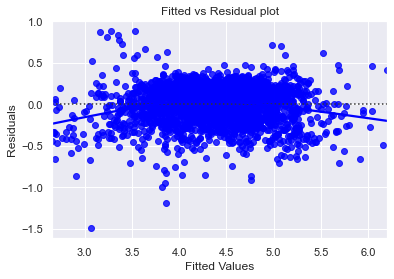

In [81]:
#plotting the fitted values vs residuals
sns.residplot(data = df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows no pattern among the points when plotted by residuals (errors) vs fitted values (predicted values). 
- This means that the model is not capturing any non-linear effects. 
- Since the scatter plot shows no pattern, we can consider the assumptions of linearity and independence satisfied. 

### 4. Testing for Normality
- We will do this by plotting the residuals using a histogram and utilizing a QQ plot.
- We will also double check for normality using a Shapiro-Wilk test.  

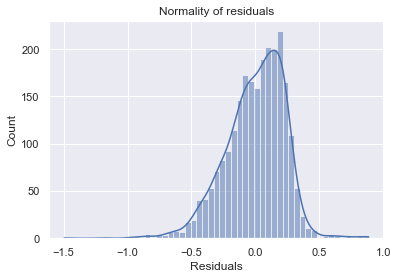

In [82]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals has a bell-shape for the most part. The shape is very slightly skewed to the left but is mostly symmetrical. 
- We will further confirm normality with a QQ plot

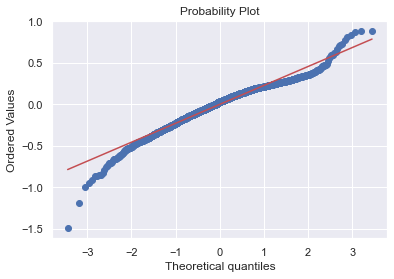

In [83]:
#creating a QQ plot of the residuals
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [84]:
df_pred["Residuals"].skew()

-0.6266423573313972

- The residuals follow a straight line more or less, except for the tails. 
- The skewness value (-0.627) shows that the data is moderately skewed. But since this value is not greater than -1, we can consider this amount of skewness acceptable for the model. 
- This seems pretty normal but we will double check using a Shapiro-Wilk test. 

In [85]:
#Running a Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9690815806388855, pvalue=2.105690889523832e-22)

For the Shapiro-Wilk test, we will be testing the following hypotheses:  
    - Null hypothesis: residuals are normally distributed
    - Alt hypothesis: residuals are not normally distributed
- Since the p-value is less than 0.05, we can reject the null hypothesis of normally distributed residuals. 
- The residuals are technically not normal according to the test but as an approximation, we can accept this as is. 


The distribution is close enough to normality to deem the assumption as satisfied. 

### 5. Testing for Homoscedasticity

To test for homoscedasticity (lack of heteroscedasticity) using a Goldfeldquandt test. 

- For the test, we will be using the following hypotheses: 
    - Null hypothesis: residuals are homoscedastic
    - Alt hypothesis: residuals have heteroscedasticity

In [86]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.0431128107825935), ('p-value', 0.23292738306794344)]

- Since the p-value is greater than 0.05, we fail to reject the null hypothesis. Therefore, the residuals are homoscedastic. 
- The assumption of homoscedasticity is therefore satisfied. 

## Final Model Summary

Now that all of the assumptions of linear regression are checked and satisfied, we can will create a final regression model summary using olsmod2, x_train2, x_test2, y_train, and y_test. 

In [87]:
#predictions on the test set
pred = olsmod2.predict(x_test2)

#creating a new dataframe with the actual and predicted values
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.373852
2341,3.696103,3.962951
1913,3.592093,3.691084
688,4.306495,4.116870
650,4.522115,5.137584
2291,4.259294,4.395320
40,4.997685,5.434438
1884,3.875359,4.054813
2538,4.206631,4.047358
45,5.380450,5.276783


- Using our model, the actual and predicted values are very similar and comparable. This means that we have created an effective and reliable model. 
- A bargraph will be produced to show visualize the comparison between the actual and predicted values. Because the number of records is so large, we will only be taking a sample of 25 records to use within the bargraph. 

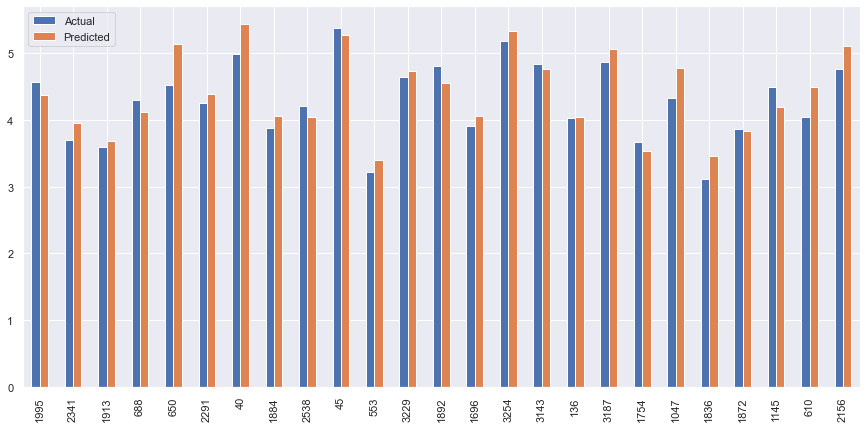

In [88]:
df2 = df_pred_test.sample(25, random_state=1)
df2.plot(kind = "bar", figsize = (15,7))
plt.show()

In [89]:
# Checking the model performance on the train set (70% of the data)
print("Training Performance\n")
ols_final_train = model_performance_regression(olsmod2, x_train2, y_train)
ols_final_train

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,25.586068,16.732904,0.787221,0.785892,19.037828


In [90]:
# Checking the model performance on the test set (30% of the data)
print("Test Performance\n")
ols_final_test = model_performance_regression(olsmod2, x_test2, y_test)
ols_final_test

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,24.089251,16.476979,0.792189,0.789136,19.265007


- The model is able to explain 78% of the variation in the data. 
- The train and test RMSE and MAE are close in value, indicating that our model is not overfit. 
- The MAPE suggests that we can predict within 19% of the used price. 
- Our model is a good tool for prediction and inference. 

In [91]:
#recreating the final statsmodel model and summary
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     988.3
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:35:42   Log-Likelihood:                 104.95
No. Observations:                2417   AIC:                            -181.9
Df Residuals:                    2403   BIC:                            -100.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -19.4495      3.64

## Actionable Insights and Recommendations

Significance of predictors and key takeaways:
- Most of the predictor variables have positive coefficients. This means that as these variables increase, the used price of the device also increases. For example, for every 1 unit increase in screen size (1 cm), the value of the device when being sold used increases by 0.025 euros. 
- Newer devices (increased release year) increases the value of the device when sold. 
- As screen size, main camera megapixels, selfie camera megapixels, internal ram, weight, and release year increase, the value of the device when being sold used also increases. 
- Battery life has a negative coefficient value (but the coefficient value is very small). This means that as the overall battery life in mAhs increases, the price when sold used tends to decrease every so slightly. Because of this, we can essentially assume that increased battery capacity should not be a selling point for used devices as it really does not increase the value at all. 
- Devices made by Lenovo, Nokia, and Xiaomi actually have a positive influence on the used price compared to all of the other the brands that were dropped while building the model. From a sales standpoint, these 3 brands have a slight influence on the resale value of the used device. 
- Os_Others also has a negative coefficient. This means that essentially if devices do not have a Android, iOS, or Windows operating system, this brings down the price of the device when sold used. Devices that have a more well-known OS have better resale value. 
- new_price_log has the highest coefficient value than any other variable. This means that for every 1 unit (1 euro) increase in the price of the device when it is brand new, the used price increases by 0.42 euros. This makes sense given the nature of selling anything used - the more expensive the object was to buy originally, the higher value it holds, and the more expensive it was still be when sold used. 
    - From a business standpoint, devices that are more expensive when new are going to be more valuable when sold used. 
    - The new price of the device has the biggest influence on the price when sold used compared to any other trait. 